In [5]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np
import time

from src import model
from src import util
from src.body import Body
import config
import mediapipe as mp

In [3]:
body_estimation = Body('model/body_pose_model.pth')

In [41]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)
index_map = {
    0: 0,    # Nose
    2: 15,    # Left Eye
    5: 14,    # Right Eye
    7: 17,    # Left Ear
    8: 16,    # Right Ear
    11: 5,   # Left Shoulder
    12: 2,   # Right Shoulder
    13: 6,   # Left Elbow
    14: 3,   # Right Elbow
    15: 7,   # Left Wrist
    16: 4,  # Right Wrist
    23: 11,  # Left Hip
    24: 8,  # Right Hip
    25: 12,  # Left Knee
    26: 9,  # Right Knee
    27: 13,  # Left Ankle
    28: 10   # Right Ankle
}
def convert_mediapipe_to_openpose(landmarks, image_width, image_height, visibility_threshold=0):

    keypoints = np.zeros((18, 3), dtype=np.float32)

    # Map known keypoints
    for mp_idx, op_idx in index_map.items():
        lm = landmarks[mp_idx]
        if lm.visibility > visibility_threshold:
            keypoints[op_idx] = [int(lm.x * image_width),int(lm.y * image_height),lm.visibility]

    # Compute neck (index 17) only if both shoulders are valid
    left_shoulder = landmarks[11]
    right_shoulder = landmarks[12]
    if left_shoulder.visibility > visibility_threshold and right_shoulder.visibility > visibility_threshold:
        neck_x = int((left_shoulder.x + right_shoulder.x) / 2 * image_width)
        neck_y = int((left_shoulder.y + right_shoulder.y) / 2 * image_height)
        keypoints[1] =  [neck_x,neck_y,(left_shoulder.visibility+right_shoulder.visibility)/2]


    return keypoints

I0000 00:00:1746716867.978296  683408 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1 Pro


W0000 00:00:1746716868.145887  720758 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1746716868.214523  720759 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


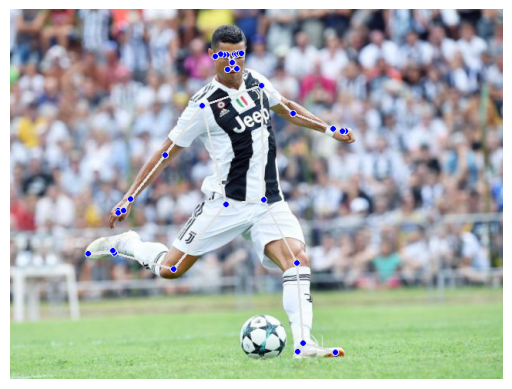

In [55]:
test_image = './images/ronaldo1.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
image_rgb = cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)
keypoints1 = convert_mediapipe_to_openpose(results.pose_landmarks.landmark,image_rgb.shape[1],image_rgb.shape[0])
mp_drawing = mp.solutions.drawing_utils

# Assuming `results` is from pose.process(image_rgb)
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image_rgb,  # image in BGR format
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS
    )
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

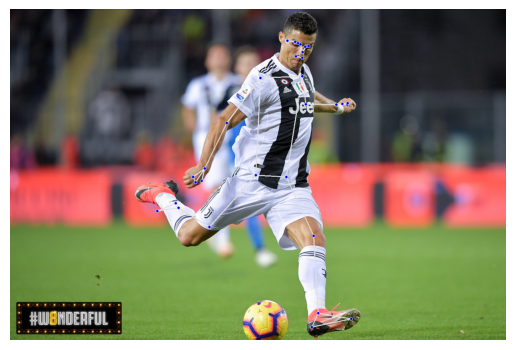

In [56]:
test_image = './images/ronaldo2.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
image_rgb = cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)
keypoints2 = convert_mediapipe_to_openpose(results.pose_landmarks.landmark,image_rgb.shape[1],image_rgb.shape[0])
mp_drawing = mp.solutions.drawing_utils

# Assuming `results` is from pose.process(image_rgb)
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image_rgb,  # image in BGR format
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS
    )
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [58]:
keypoints1

array([[6.4900000e+02, 1.0500000e+02, 9.9973983e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.6000000e+02, 1.5600000e+02, 9.9990582e-01],
       [4.4300000e+02, 1.3700000e+02, 9.6053374e-01],
       [3.2000000e+02, 1.5200000e+02, 9.4808793e-01],
       [7.2200000e+02, 2.1000000e+02, 9.9724483e-01],
       [8.1700000e+02, 2.2400000e+02, 9.1457886e-01],
       [9.0000000e+02, 2.0100000e+02, 8.0893612e-01],
       [5.5000000e+02, 4.4100000e+02, 9.9924541e-01],
       [3.6500000e+02, 5.1300000e+02, 9.9367934e-01],
       [2.2600000e+02, 7.0200000e+02, 9.9684590e-01],
       [6.5900000e+02, 4.5000000e+02, 9.9108469e-01],
       [7.9700000e+02, 5.7800000e+02, 9.8291230e-01],
       [9.8300000e+02, 6.8200000e+02, 9.7863501e-01],
       [6.4400000e+02, 8.6000000e+01, 9.9937880e-01],
       [6.7200000e+02, 9.6000000e+01, 9.9854088e-01],
       [6.3500000e+02, 9.4000000e+01, 9.9945635e-01],
       [6.4100000e+02, 1.8300000e+02, 9.9857533e-01]], dtype=float32)

In [59]:
keypoints2

array([[8.2500000e+02, 1.2100000e+02, 9.9999988e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [7.0600000e+02, 1.9400000e+02, 9.9999487e-01],
       [6.1100000e+02, 3.2100000e+02, 9.9805897e-01],
       [5.4900000e+02, 4.4900000e+02, 9.9603218e-01],
       [8.2400000e+02, 1.8900000e+02, 9.9999356e-01],
       [8.3400000e+02, 2.6800000e+02, 6.0087752e-01],
       [9.2000000e+02, 2.6900000e+02, 9.7738123e-01],
       [6.9300000e+02, 4.6800000e+02, 9.9997461e-01],
       [5.6200000e+02, 6.1400000e+02, 9.8942542e-01],
       [4.7500000e+02, 5.6000000e+02, 8.4393901e-01],
       [7.7900000e+02, 4.7300000e+02, 9.9999881e-01],
       [8.5600000e+02, 6.3900000e+02, 9.8138946e-01],
       [8.6900000e+02, 8.5700000e+02, 9.9176699e-01],
       [8.1200000e+02, 9.6000000e+01, 9.9999988e-01],
       [8.3900000e+02, 1.0400000e+02, 9.9999940e-01],
       [7.8200000e+02, 8.9000000e+01, 1.0000000e+00],
       [7.6500000e+02, 1.9200000e+02, 9.9999422e-01]], dtype=float32)

I0000 00:00:1746686118.615537   21578 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1746686118.798072   32054 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1746686118.816497   32056 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1746686118.843383   32053 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


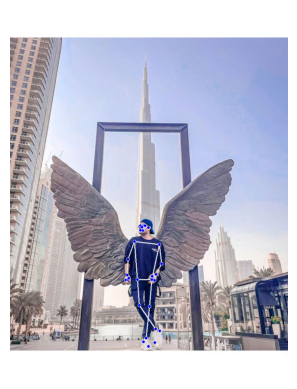

In [11]:

mp_drawing = mp.solutions.drawing_utils

# Assuming `results` is from pose.process(image_rgb)
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image_rgb,  # image in BGR format
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS
    )
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

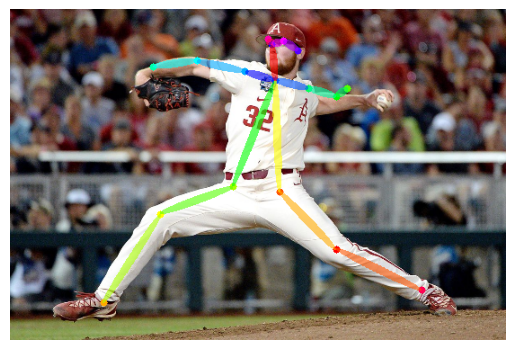

In [50]:
test_image = 'images/pitching1.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
scale =368/ oriImg.shape[0]
oriImg = cv2.resize(oriImg,None,fx=scale,fy=scale)
candidate, subset = body_estimation(oriImg)

canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, [subset])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

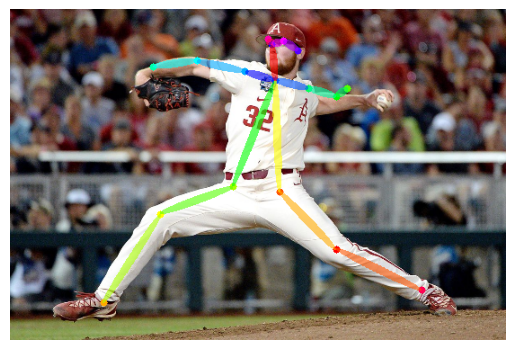

In [ ]:
test_image = 'images/pitching1.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
scale =368/ oriImg.shape[0]
oriImg = cv2.resize(oriImg,None,fx=scale,fy=scale)
candidate, subset = body_estimation(oriImg)

canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, [subset])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [51]:
candidate

array([[1.50000000e+02, 0.00000000e+00, 1.85258508e-01, 0.00000000e+00],
       [3.54000000e+02, 0.00000000e+00, 1.08943872e-01, 1.00000000e+00],
       [8.10000000e+01, 3.00000000e+01, 2.21815750e-01, 2.00000000e+00],
       [4.05000000e+02, 3.20000000e+01, 3.34191710e-01, 3.00000000e+00],
       [2.91000000e+02, 3.90000000e+01, 9.43904221e-01, 4.00000000e+00],
       [8.70000000e+01, 9.70000000e+01, 2.62191623e-01, 5.00000000e+00],
       [4.21000000e+02, 1.09000000e+02, 4.70170736e-01, 6.00000000e+00],
       [0.00000000e+00, 1.21000000e+02, 2.47309238e-01, 7.00000000e+00],
       [4.94000000e+02, 1.38000000e+02, 2.54529357e-01, 8.00000000e+00],
       [7.60000000e+01, 2.23000000e+02, 1.54248297e-01, 9.00000000e+00],
       [1.50000000e+02, 0.00000000e+00, 1.33939043e-01, 1.00000000e+01],
       [3.44000000e+02, 0.00000000e+00, 2.00222582e-01, 1.10000000e+01],
       [8.30000000e+01, 3.80000000e+01, 3.05157840e-01, 1.20000000e+01],
       [4.05000000e+02, 4.40000000e+01, 4.16078240e

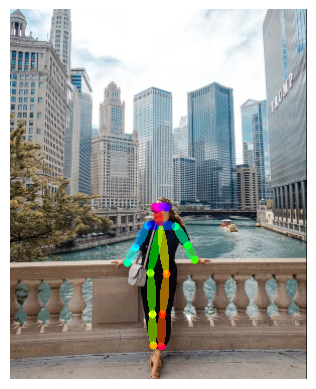

In [18]:
compare_image = '../../images/4030d78e3ce9540fbfb12b20700cafa0.jpg'
compare_image = cv2.imread(compare_image)  # B,G,R order
scale =368/ compare_image.shape[0]
compare_image = cv2.resize(compare_image,None,fx=scale,fy=scale)
#oriImg = cv2.flip(oriImg,1)
candidate_cp, subset_cp = body_estimation(compare_image)

canvas = copy.deepcopy(compare_image)
canvas = util.draw_bodypose(canvas, candidate_cp, [subset_cp])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [5]:
canvas,score,guide = body_estimation.compare(oriImg,compare_image)

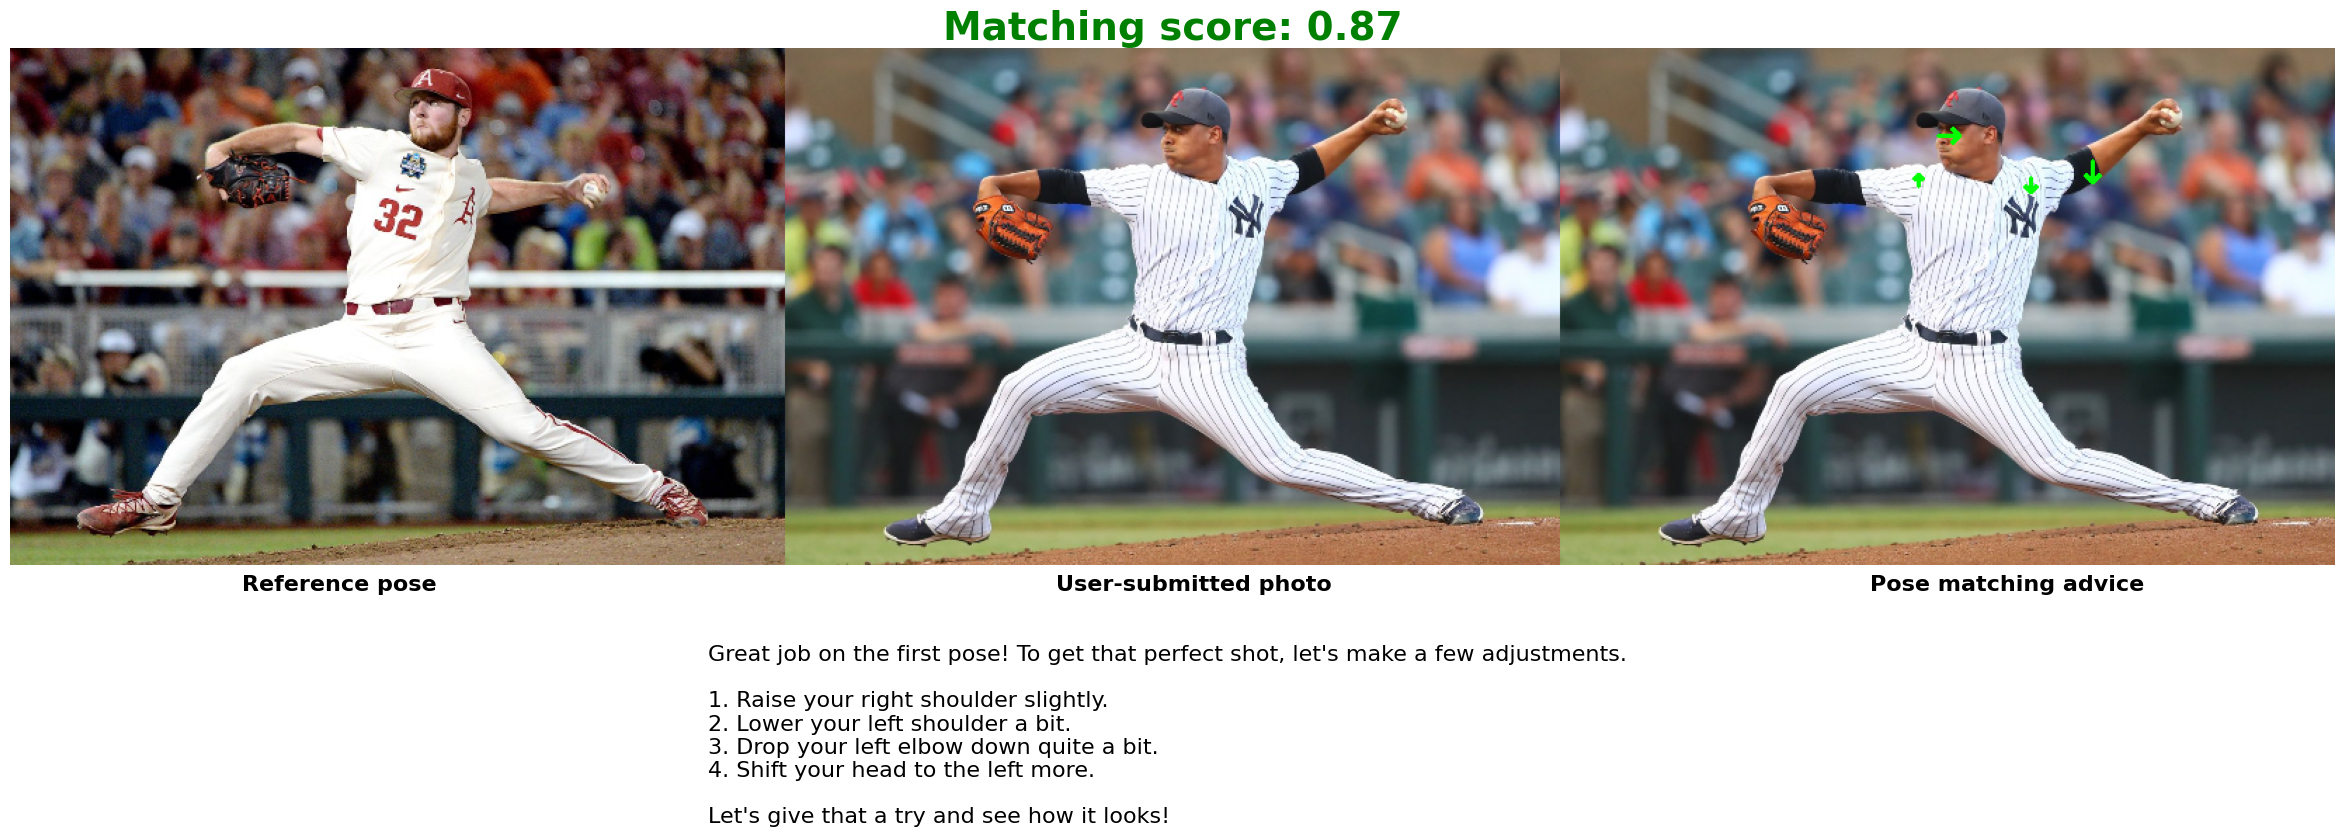

In [6]:
plt.figure(figsize=(30, 20))
# plt.title(f"Matching score: {round(score,2)}")
color = 'green' if score > 0.8 else 'orange' if score > 0.5 else 'red'
plt.title(f"Matching score: {round(score,2)}", fontsize=28, fontweight='bold', color=color)

plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.text(
    0.1, -0.05, "Reference pose", fontweight='bold',fontsize=16, transform=plt.gca().transAxes
)
plt.text(
    0.45, -0.05, "User-submitted photo", fontweight='bold',fontsize=16, transform=plt.gca().transAxes
)
plt.text(
    0.8, -0.05, "Pose matching advice", fontweight='bold',fontsize=16, transform=plt.gca().transAxes
)
plt.text(
    0.3, -0.5, guide, fontsize=16, ha='left', transform=plt.gca().transAxes
)
plt.show()

In [28]:
plt.savefig("output1.png")

<Figure size 640x480 with 0 Axes>

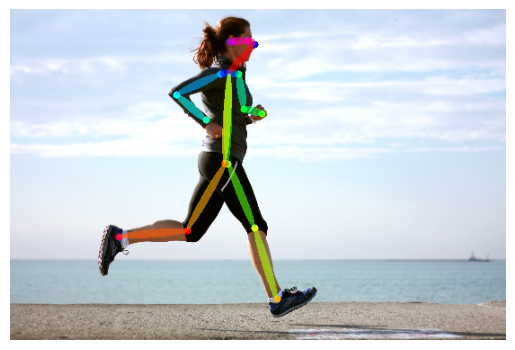

In [29]:
test_image = 'images/running1.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
scale =368/ oriImg.shape[0]
oriImg = cv2.resize(oriImg,None,fx=scale,fy=scale)
candidate, subset = body_estimation(oriImg)

canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, [subset])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

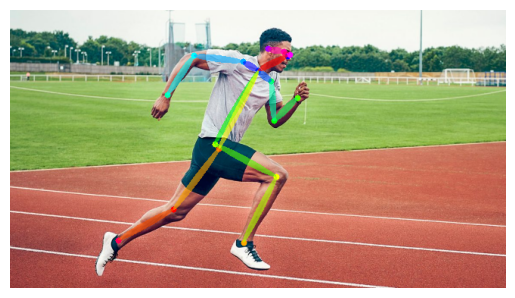

In [30]:
compare_image = 'images/running2.jpg'
compare_image = cv2.imread(compare_image)  # B,G,R order
scale =368/ compare_image.shape[0]
compare_image = cv2.resize(compare_image,None,fx=scale,fy=scale)
#oriImg = cv2.flip(oriImg,1)
candidate_cp, subset_cp = body_estimation(compare_image)

canvas = copy.deepcopy(compare_image)
canvas = util.draw_bodypose(canvas, candidate_cp, [subset_cp])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [31]:
canvas,score,guide = body_estimation.compare(oriImg,compare_image)

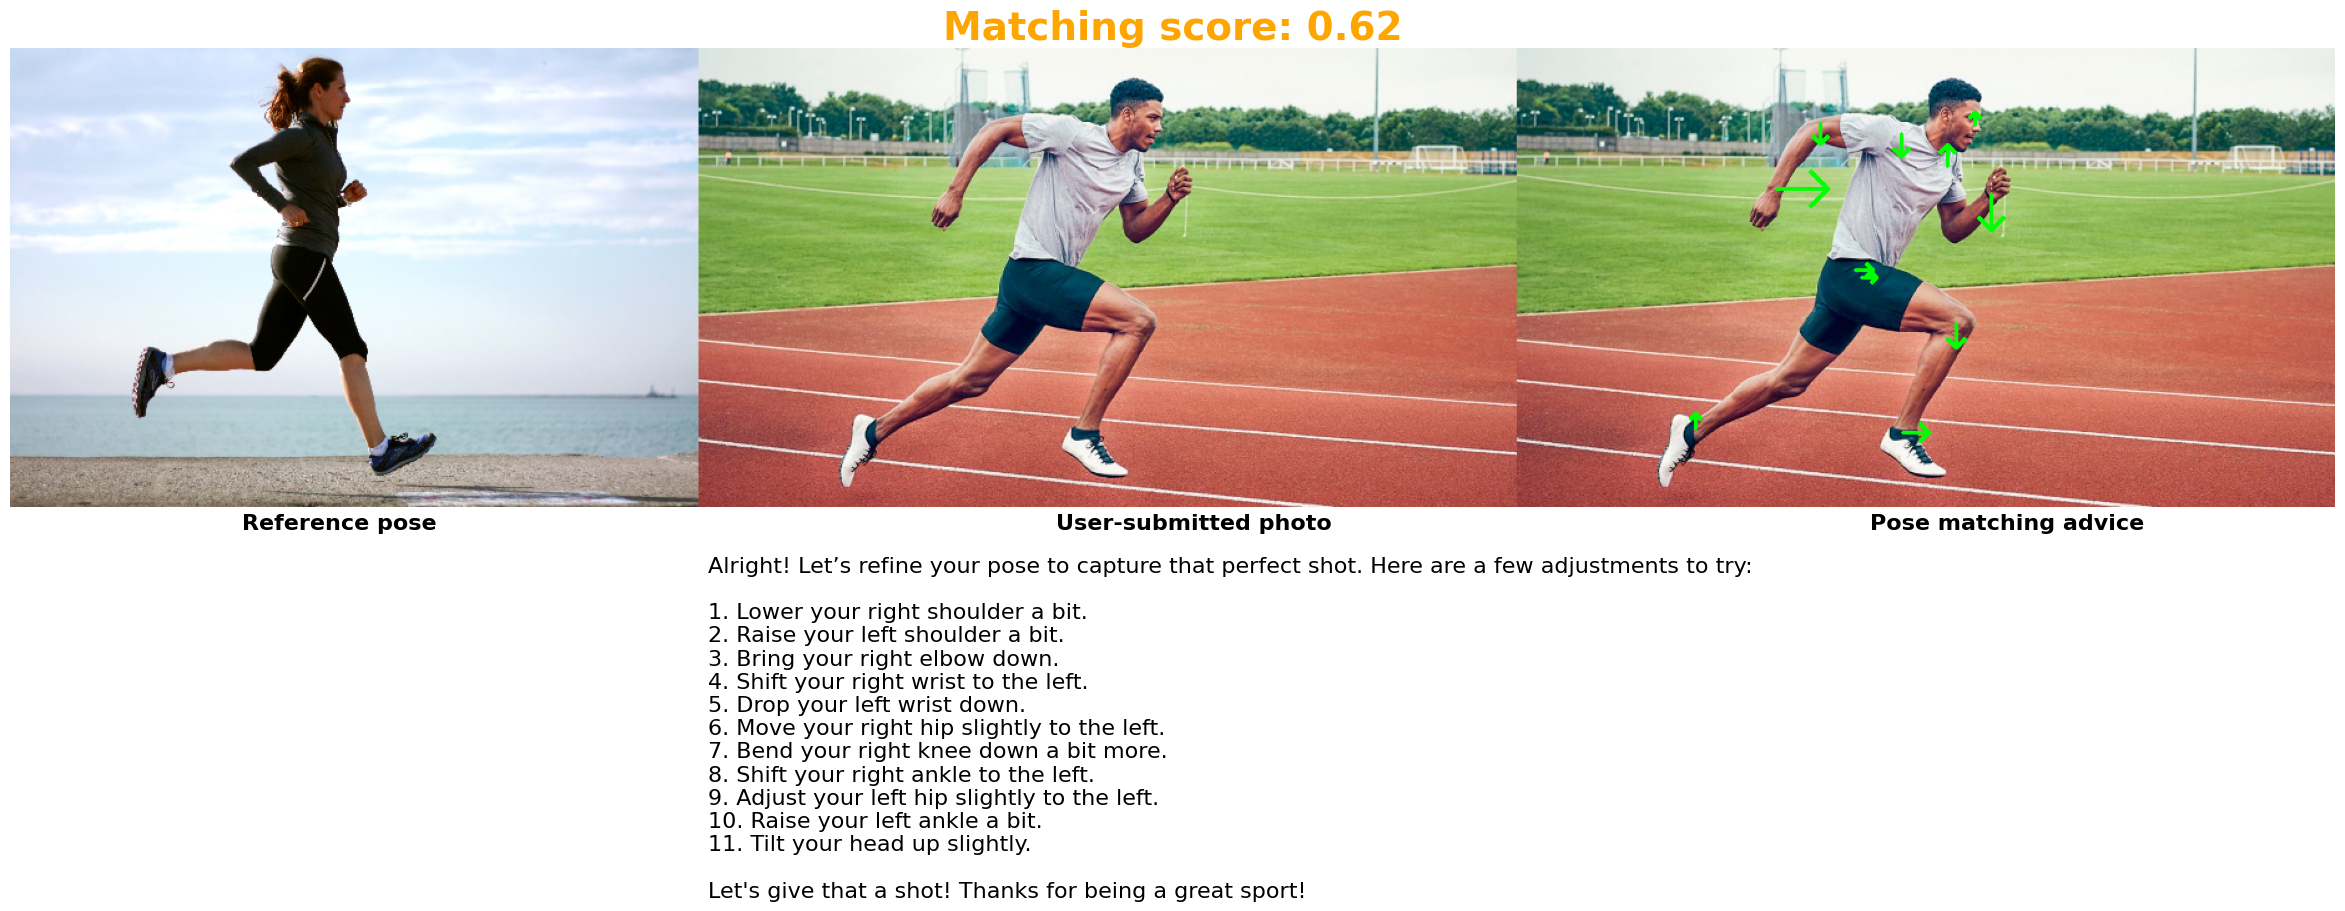

In [35]:
plt.figure(figsize=(30, 20))
# plt.title(f"Matching score: {round(score,2)}")
color = 'green' if score > 0.8 else 'orange' if score > 0.5 else 'red'
plt.title(f"Matching score: {round(score,2)}", fontsize=28, fontweight='bold', color=color)

plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.text(
    0.1, -0.05, "Reference pose", fontweight='bold',fontsize=16, transform=plt.gca().transAxes
)
plt.text(
    0.45, -0.05, "User-submitted photo", fontweight='bold',fontsize=16, transform=plt.gca().transAxes
)
plt.text(
    0.8, -0.05, "Pose matching advice", fontweight='bold',fontsize=16, transform=plt.gca().transAxes
)
plt.text(
    0.3, -0.85, guide, fontsize=16, ha='left', transform=plt.gca().transAxes
)
plt.show()

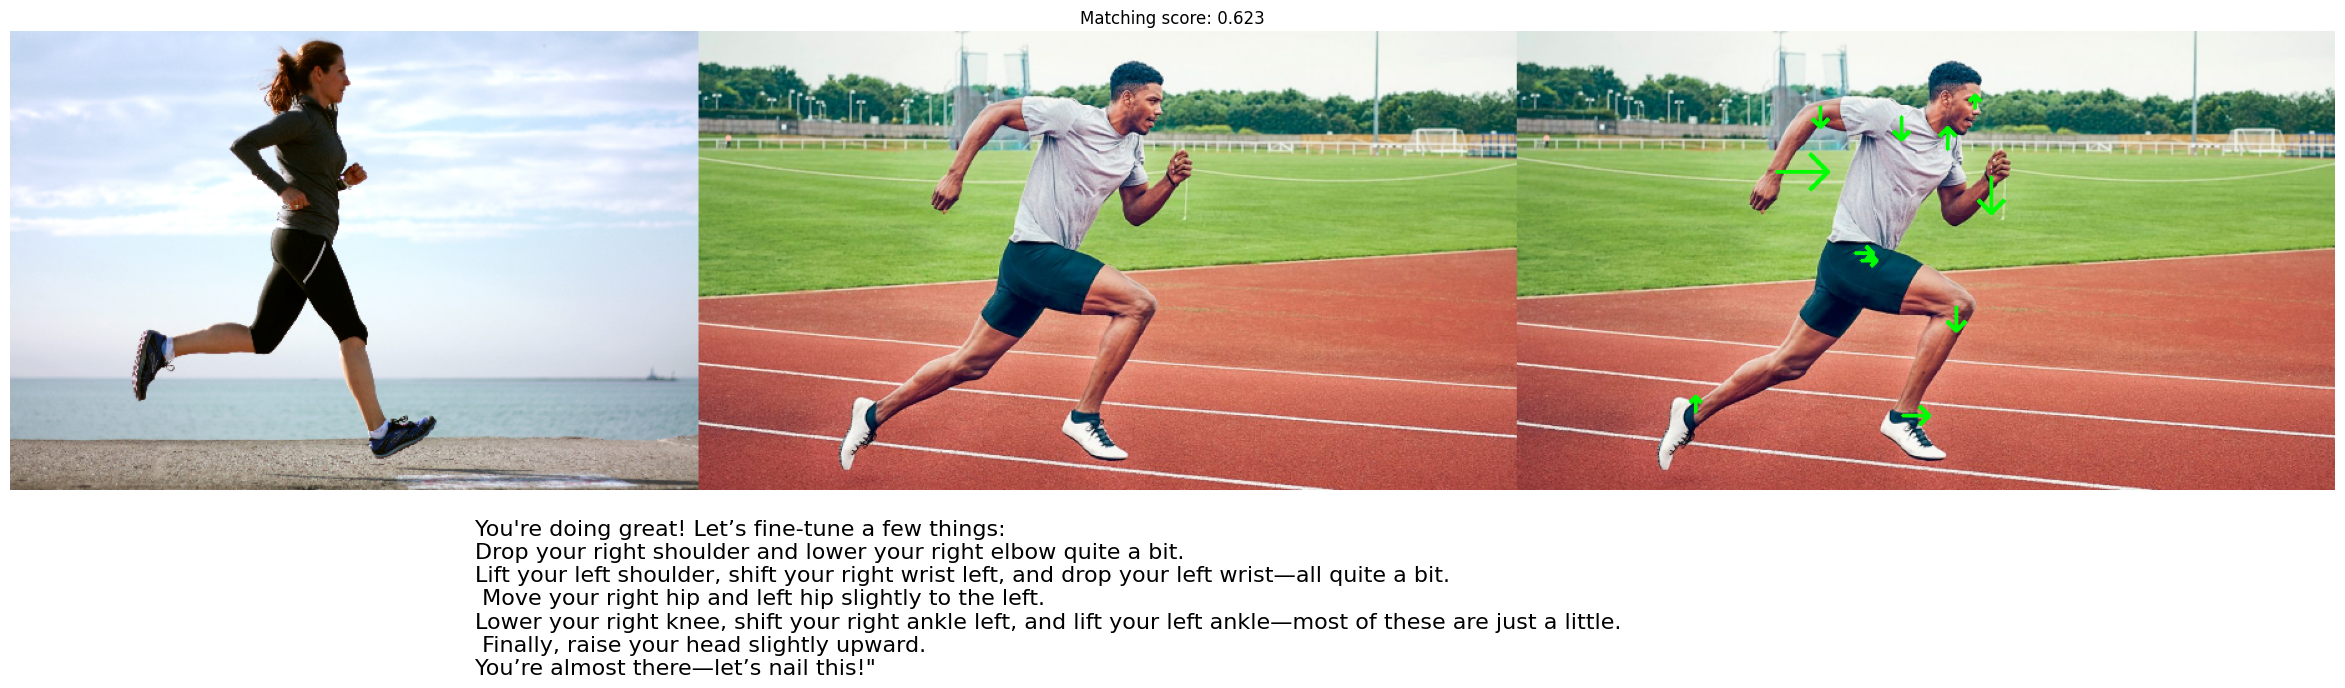

In [64]:
horizontal = cv2.hconcat([oriImg, compare_image, canvas1])
plt.figure(figsize=(30, 20))
plt.title(f"Matching score: {round(angles[1],3)}")
plt.imshow(horizontal[:, :, [2, 1, 0]])
plt.axis('off')
description = '''You're doing great! Let’s fine-tune a few things:\nDrop your right shoulder and lower your right elbow quite a bit. \nLift your left shoulder, shift your right wrist left, and drop your left wrist—all quite a bit. \n Move your right hip and left hip slightly to the left.\nLower your right knee, shift your right ankle left, and lift your left ankle—most of these are just a little.\n Finally, raise your head slightly upward.\nYou’re almost there—let’s nail this!"'''
plt.text(
    0.2, -0.4, description, fontsize=16, ha='left', transform=plt.gca().transAxes
)
plt.show()